# Catboost

In [150]:
# количество значений
N = 50

## Линейная регрессия

In [151]:
import numpy 
import random

train_x = numpy.arange(0,N,1) 
# генерация шума
noise = numpy.random.normal(0, 1, len(train_x)) #  μ = 0, σ = 2, size = length of x or y. Choose μ and σ wisely.
# добавления шума к произвольной функции
train_y = (0.3*train_x + 0.5) + noise  

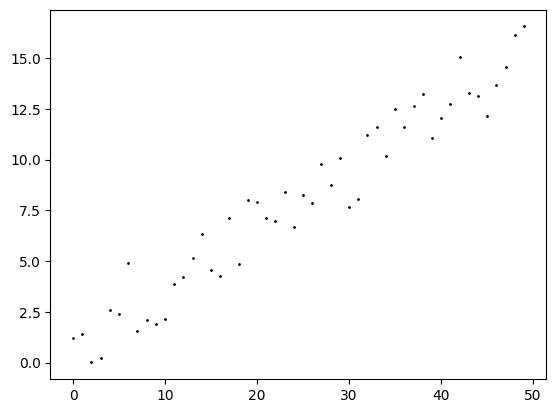

In [152]:
# график входных значений
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1)
axs.plot(train_x,train_y, 'o', color="black", markersize=1)
plt.show()
plt.close("all")

In [153]:
from catboost import CatBoostRegressor
# инициализация классификатора CatBoostRegressor
# параметры классификатора, в этом примере, не имеют значения
model = CatBoostRegressor(iterations=5,
                          learning_rate=1,
                          depth=2)
# тренировка модели
model.fit(train_x, train_y)
# генерация тестовых данных
test_x = numpy.expand_dims(numpy.arange(0,50,3) , axis=1)
# предсказание
pred_y = model.predict(test_x)

0:	learn: 2.3901914	total: 135us	remaining: 542us
1:	learn: 1.6078319	total: 570us	remaining: 855us
2:	learn: 1.5424658	total: 600us	remaining: 400us
3:	learn: 1.3577739	total: 625us	remaining: 156us
4:	learn: 1.2374966	total: 685us	remaining: 0us


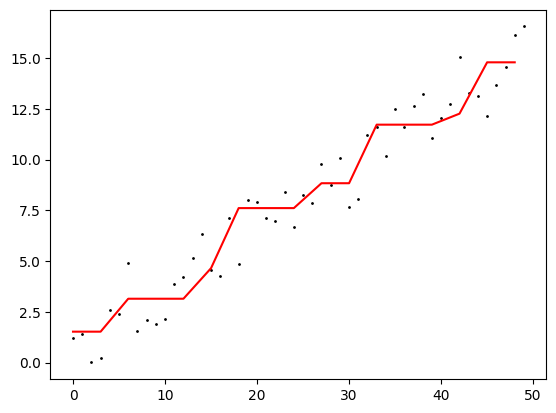

In [154]:
# график выходных значений
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1)
# тренировочные значения
axs.plot(train_x,train_y, 'o', color="black", markersize=1)
# предсказанные значения
axs.plot(test_x,pred_y,  color="red", markersize=1)
plt.show()
plt.close("all")

## Бинарная классификация

In [155]:
import numpy 

train_x1 = numpy.arange(0,N,2,dtype=float) 
# генерация шума
noise = numpy.random.normal(0, 1, len(train_x1)) 
# добавления шума к произвольной функции
train_y1 = (0.3*train_x1 + 0.0) + noise
train_label1 = numpy.full(len(train_x1), 0)


In [156]:
train_x2 = numpy.arange(0,N,3,dtype=float) 
# генерация шума
noise = numpy.random.normal(0, 1, len(train_x2)) 
# добавления шума к произвольной функции
train_y2 = (0.3*train_x2 + 5.0) + noise  
train_label2 = numpy.full(len(train_x2), 1)

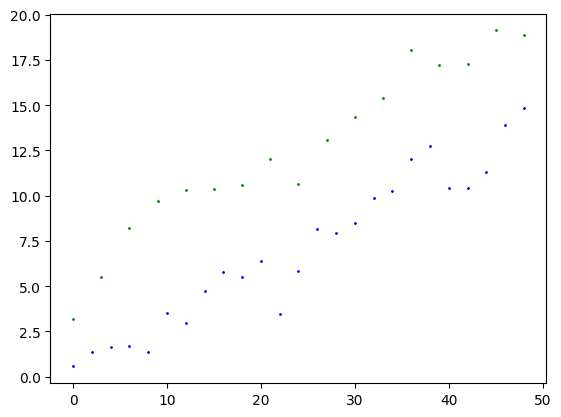

In [157]:
# график входных значений
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1)
axs.plot(train_x1,train_y1, 'o', color="blue", markersize=1)
axs.plot(train_x2,train_y2, 'o', color="green", markersize=1)
plt.show()
plt.close("all")

In [158]:
# объединяем значения 1 и 2
train_x = numpy.concatenate(( train_x1, train_x2 ), axis=0)
train_y = numpy.concatenate(( train_y1, train_y2 ), axis=0)

In [159]:
# вектор транспоируем и объединяем два вектора в матрицу
train_data = numpy.concatenate(( train_x.reshape(len(train_x),1), train_y.reshape(len(train_y),1) ), axis=1)
# объединяем значения двух наборов данных и транспонируем
train_labels = numpy.concatenate(( train_label1, train_label2 ), axis=0)
train_labels = train_labels.reshape(len(train_labels),1)

In [160]:
from catboost import CatBoostClassifier
# инициализация классификатора CatBoostClassifier
# параметры классификатора, в этом примере, не имеют значения
model = CatBoostClassifier(iterations=5,
                           learning_rate=1,
                           depth=2)
# тренировка модели
model.fit(train_data, train_labels)


0:	learn: 0.5847182	total: 132us	remaining: 531us
1:	learn: 0.4832299	total: 520us	remaining: 781us
2:	learn: 0.4232053	total: 633us	remaining: 422us
3:	learn: 0.3602778	total: 680us	remaining: 170us
4:	learn: 0.3142742	total: 725us	remaining: 0us


In [161]:
## генерируем тестовые данные
eval_x = numpy.arange(0,N,5,dtype=float) 
# генерация шума
noise = numpy.random.normal(0, 1, len(eval_x)) 
# добавления шума к произвольной функции
eval_y = (0.3*eval_x + 2) + noise  # функция сдвинута между двумя предыдущими
# транспонируем, делаем матрицу (точнее, вектор векторов)
eval_data = numpy.concatenate(( eval_x.reshape(len(eval_x),1), eval_y.reshape(len(eval_y),1) ), axis=1)

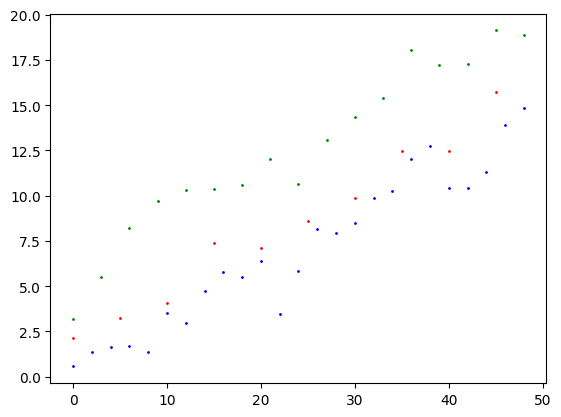

In [162]:
# график с учетом тестовых данных
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1)
axs.plot(train_x1,train_y1, 'o', color="blue", markersize=1)
axs.plot(train_x2,train_y2, 'o', color="green", markersize=1)
axs.plot(eval_x,eval_y, 'o', color="red", markersize=1)
plt.show()
plt.close("all")

In [163]:
# делаем прогноз
preds_class = model.predict(eval_data)
# вероятности прогноза
preds_proba = model.predict_proba(eval_data)
print(preds_class)
print(preds_proba)

[0 0 0 0 0 0 0 0 0 1]
[[0.72889466 0.27110534]
 [0.72889466 0.27110534]
 [0.72889466 0.27110534]
 [0.84589903 0.15410097]
 [0.84589903 0.15410097]
 [0.66215376 0.33784624]
 [0.55887584 0.44112416]
 [0.74269387 0.25730613]
 [0.74269387 0.25730613]
 [0.21438142 0.78561858]]


In [164]:
# создаем фильтры для прогнозных значений
filter_0 = preds_class == 0
filter_1 = preds_class == 1
# класс 0, зеленый график
eval_0 = eval_data[filter_0]
print(eval_0)
# класс 1, синий график
eval_1 = eval_data[filter_1]
print(eval_1)


[[ 0.          2.15878511]
 [ 5.          3.26139795]
 [10.          4.04891999]
 [15.          7.36391799]
 [20.          7.12684776]
 [25.          8.5984108 ]
 [30.          9.88985562]
 [35.         12.45313726]
 [40.         12.48655536]]
[[45.         15.73812538]]


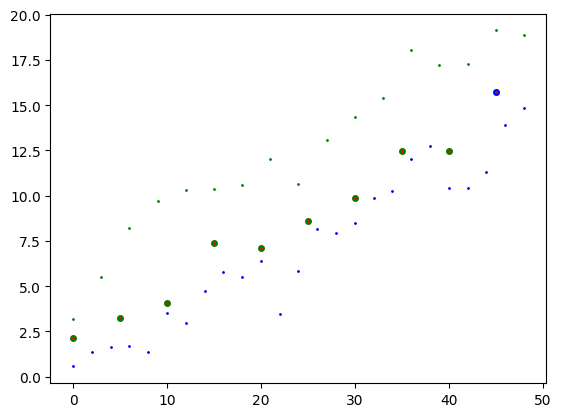

In [165]:
# график выходных значений
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1)
# тренироваочны данные
axs.plot(train_x1,train_y1, 'o', color="blue", markersize=1)
axs.plot(train_x2,train_y2, 'o', color="green", markersize=1)
# прогнозные данные
axs.plot(eval_0[:,0],eval_0[:,1], 'o', color="green", markersize=4)
axs.plot(eval_1[:,0],eval_1[:,1], 'o', color="blue", markersize=4)
axs.plot(eval_x,eval_y, 'o', color="red", markersize=1)
plt.show()
plt.close("all")